## 2b. Exercícios com as séries de Taylor e de Fourier

**Série de Taylor:** Como sabemos, a série de Taylor de uma função $f(x)$ em torno de $x=a$ é definida como:

$$ f(x) = \sum_{n = 0}^{\infty} f^{(n)}(a)\frac{(x-a)^n}{n!},
$$

onde $f^{(n)}$ é a n-ésima derivada de $f$ e $f^{(0)}$ é a própria função $f$. 

**Exercício 1:** Desenvolva a série de Taylor em $a=0$ para a função exponencial $e^x$. e verifique que 

$$e^x=\sum_{n=0}^{\infty} \frac{x^n}{n!}.$$

Então, encontre aproximações para $e^{0.3}$ com precisão de 5 casas decimais. Quantos termos da série foram necessários?

**Exercício 2:** Desenvolva a série de Taylor em $a=0$ para a função $\operatorname{sen}(x)$. e verifique que 

$$
\operatorname{sen}(x)=\sum_{n=0}^{\infty} \frac{(-1)^n}{(2 n+1)!} x^{2 n+1}
$$


Então, encontre aproximações para $\operatorname{sen}(\pi/4)$ com 3, 5 e 20 termos.

**Exercício 3:** A função cosseno pode ser representada pela série de série de Taylor em $a=0$ (ou série de Maclaurin), fazendo
$$
\cos x=\sum_{n=0}^{\infty} \frac{(-1)^n}{(2 n)!} x^{2 n}.
$$
Descubra quantos termos da série são necessários para obter uma aproximação para $\cos(\pi/6)$ com erro relativo menor que $10^4$.

**Exercício 4:** Sabendo que a função $ln(1+x)$ pode ser representada pela série de Maclaurin, fazendo
$$
\ln (1+x)=\sum_{n=0}^{\infty} \frac{(-1)^n}{n+1} x^{n+1} \quad \text { para }|x|<1
$$

Descubra quantos termos da série são necessários para obter uma aproximação para $ln(0.2)$ com erro relativo menor que $10^4$.

**Série de Fourier:** (Fonte: [Chapra e Canale, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/486))

Para uma função de período T, uma série de Fourier contínua no tempo pode ser escrita

$$
f(t)=a_0+a_1 \cos \left(\omega_0 t\right)+b_1 \operatorname{sen}\left(\omega_0 t\right)+a_2 \cos \left(2 \omega_0 t\right)+b_2 \operatorname{sen}\left(2 \omega_0 t\right)+\cdots$$

ou, mais concisamente,

$$f(t)=a_0+\sum_{k=1}^{\infty}\left[a_k \cos \left(k \omega_0 t\right)+b_k \operatorname{sen}\left(k \omega_0 t\right)\right]$$

onde $\omega_0=2 \pi / T$ é chamada de frequência fundamental e os seus múltiplos constantes $2 \omega_0, 3 \omega_0$, etc. são chamados de harmônicos. 

Os coeficientes da série de Fourier podem ser calculados por

$$
a_k=\frac{2}{T} \int_0^T f(t) \cos \left(k \omega_0 t\right) d t
$$

e

$$
b_k=\frac{2}{T} \int_0^T f(t) \operatorname{sen}\left(k \omega_0 t\right) d t
$$

para $k=1,2, \ldots$ e 

$$
a_0=\frac{1}{T} \int_0^T f(t)dt
$$



As séries de Fourier são usadas para aproximar algumas funções particularmente desagradáveis, como a função degrau, por exemplo, e formam a base de muitas aplicações de engenharia, como o processamento de sinais. Vamos ver alguns exemplos.


**Exercício 5:** Defina uma função para uma onda quadrada de período $T=2$ e amplitude $A=1$. Obtenha a série de Fourier com 5 termos e plote a curva, a série e a suas componentes harmônicas (termos da série). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

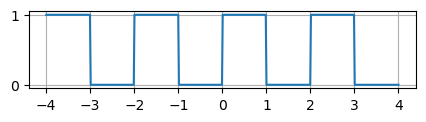

In [20]:
T = 2.0

def f(t):
    if t>0:
        if t>T: 
            return f(t-T)
        if t<1:
            return 1
        else:
            return 0
    else:
        if t<-T:
            return f(t+T)
        if t<-1:
            return 1
        else:
            return 0

x = np.linspace(-2*T,2*T,500)

plt.figure(figsize = (5, 1))
plt.plot(x,[f(xi) for xi in x])
plt.grid()

A onda quadrada par é aproximada pela série de Fourier com coeficientes $a_0=0$, $bn=0$ e 

$$
a_k=\left\{\begin{array}{cl}
4 /(k \pi) & \text { para } k=1,5,9, \ldots \\
-4 /(k \pi) & \text { para } k=3,7,11, \ldots \\
0 & \text { para } k=\text { inteiros pares }
\end{array}\right.
$$

O código abaixo pode ser usado para gerar alguns termos da série.

In [3]:
import sympy as sp
t, w0 = sp.symbols('t, w_0')
serie = 0

for n in range(1,10,2):
    serie += (-1)**(n//2)*(4/sp.pi)*sp.cos(n*w0*t)/n
serie

4*cos(t*w_0)/pi - 4*cos(3*t*w_0)/(3*pi) + 4*cos(5*t*w_0)/(5*pi) - 4*cos(7*t*w_0)/(7*pi) + 4*cos(9*t*w_0)/(9*pi)

In [4]:
s = sp.lambdify(t, serie) 

O código abaixo plota os gráficos da onda quadrada, a aproximação pos série de Fourier e as componentes harmônicas da onda (termos da série).

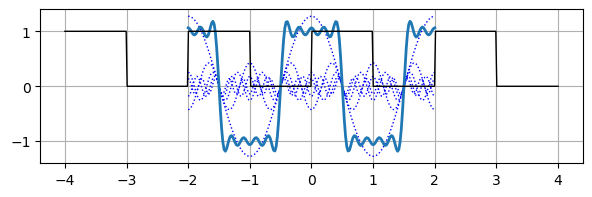

In [5]:
ti = np.linspace(-T,T,200)
soma=0
w = 2*np.pi/T

plt.figure(figsize = (7, 2))
for n in range(1,10,2):
    comp = (-1)**(n//2)*(4/np.pi)*np.cos(n*w*ti)/n
    soma += comp
    plt.plot(ti, comp, 'b:',lw=1)

plt.plot(ti, soma, lw=2)
plt.plot(x,[f(xi) for xi in x], 'k', lw=1.0)
plt.grid()
plt.show()

**Exercício 6:** 

Seja a função $f$ definida por

$$f(x)=\begin{cases} 
    -x,\,\,\, -\pi \leq x<  0\\
     \,\,\,\,x,\,\,\,\,\,\,\, 0 < x\leq \pi\\
\end{cases}$$

$$f(x+2\pi)=f(x)$$

Podemos plotar essa função como é mostrado abaixo.

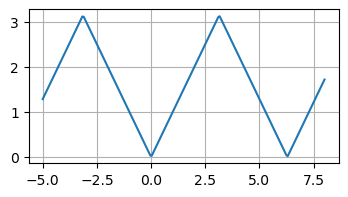

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    if abs(x)>np.pi: 
        return f(abs(x)-2*np.pi)
    if (x>0)&(x<np.pi): 
        return x
    if (x<0)&(x>-np.pi): 
        return -x
    
x = np.linspace(-5,8,200)
plt.figure(figsize = (4, 2))
plt.plot(x,[f(xi) for xi in x])
plt.grid()

Para essa função, o coeficiente $A_0$é obtido fazendo

$${A_0} = \frac{1}{\pi} \int_{-\pi}^\pi f(x)dx = \frac{1}{\pi} \int_{-\pi}^0 -x dx + \frac{1}{\pi} \int_{0}^{\pi} x dx = \frac{\pi^2}{\pi}=\pi$$

Os coeficientes $A_n$ são obtidos fazendo
$${A_n} = \frac{1}{\pi} \int_{-\pi}^\pi f(x) cos(nx)dx  = \frac{1}{\pi} \int_{-\pi}^0 -xcos(nx) dx + \frac{1}{\pi} \int_{0}^{\pi} xcos(nx) dx  =$$
$$=\frac{2\pi sen(n \pi)}{n\pi} + \frac{2 cos(n \pi)}{n^2\pi}-\frac{2}{n^2\pi}$$

Observe que para $n=1,2,3,..$ tem-se que $sen(n \pi)=0$ e para $n=2,4,6,...$ tem-se que $cos(n \pi)=1$.

Os coeficientes $B_n$ são obtidos fazendo
$${B_n} = \frac{1}{\pi} \int_{-\pi}^\pi f(x) sen(nx)dx  = \frac{1}{\pi} \int_{-\pi}^0 -xsen(nx) dx + \frac{1}{\pi} \int_{0}^{\pi} xsen(nx) dx  =$$
$$=-\frac{\pi cos(n \pi)}{n\pi} + \frac{sen(n \pi)}{n^2\pi}+\frac{\pi cos(n) \pi}{n\pi} -\frac{sen(n \pi)}{n^2\pi} = 0$$

Vamos usar Sympy para calcular as integrais e desenvolver a série:

In [7]:
import sympy as sp
x = sp.symbols('x')
n = sp.symbols('n', integer=True, positive=True)

In [8]:
A0 =(1/sp.pi)*(sp.integrate(-x, (x,-sp.pi, 0)) + sp.integrate(x, (x,0, sp.pi)))
A0

pi

In [9]:
#n>0
An=(1/sp.pi)*(sp.integrate(-x*sp.cos(n*x), (x,-sp.pi, 0))+sp.integrate(x*sp.cos(n*x), (x, 0,sp.pi)))
An

(2*(-1)**n/n**2 - 2/n**2)/pi

In [10]:
#n>0
Bn=(1/sp.pi)*(sp.integrate(x*sp.sin(n*x), (x,-sp.pi, 0))+sp.integrate(-x*sp.sin(n*x), (x,-sp.pi, 0)))
Bn

0

In [11]:
serie=sp.pi/2
for k in range(1,10):
    termo = (An*sp.cos(n*x)).subs(n,k)
    serie = serie + termo
serie

-4*cos(x)/pi - 4*cos(3*x)/(9*pi) - 4*cos(5*x)/(25*pi) - 4*cos(7*x)/(49*pi) - 4*cos(9*x)/(81*pi) + pi/2

Essa série de Fourier pode ser escrita como 

$$f(x)= \frac{\pi}{2} + \sum_{n=1}^{\infty} \left( \frac{2\pi sen(n \pi)}{n \pi} + \frac{2 cos(n \pi)}{n^2 \pi}-\frac{2}{n^2 \pi} \right)cos(nx)$$

ou 

$$f(x)= \frac{\pi}{2} + \sum_{n=0}^{\infty} \left( -\frac{4}{(2n+1)^2 \pi} \right)cos((2n+1)x)$$

Trace os primeiros cinco termos junto à soma. Construa as linhas espectrais de amplitude e de fase. 

In [12]:
serie=0
for n in range(10):
    I1 = sp.integrate(-x*sp.cos(n*x), (x,-sp.pi, 0))
    I2 = sp.integrate(x*sp.cos(n*x), (x, 0, sp.pi))
    serie = serie+sp.cos(n*x)*(I1+I2)/sp.pi
display(serie)

-4*cos(x)/pi - 4*cos(3*x)/(9*pi) - 4*cos(5*x)/(25*pi) - 4*cos(7*x)/(49*pi) - 4*cos(9*x)/(81*pi) + pi

**Exercício 7:**
Defina a função representada abaixo e plote seu gráfico. 


<img src="imagens/fig2_02.png" width="360">

Então obtenha uma série de Fourier para essa função. Plote a função e a série.

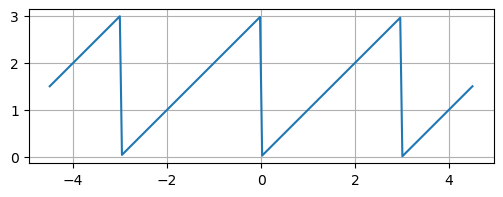

In [13]:
def h(x):
    if x>3: 
        return h(x%3)
    if x<0:
        return h(x%3+3)
    if (x>0)&(x<3): 
        return x

x = np.linspace(-4.5,4.5,200)

fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x,[h(xi) for xi in x])
plt.grid()

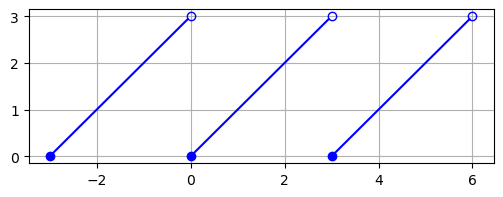

In [14]:
T = 3
g = lambda x: np.mod(x, 9)
I = np.linspace(-3,3)

fig, ax = plt.subplots(figsize=(6,2))

for n in np.unique(np.floor(I/T)):
    x = np.linspace(0,T)
    ax.plot(x[0:-1]-n*T,[g(xi) for xi in x[0:-1]], 'b')
    ax.plot(x[0]-n*T, g(x[0]),marker='o',color='blue',fillstyle='full')
    ax.plot(x[-1]-n*T, g(x[-1]),marker='o',color='blue',fillstyle='none')
plt.grid()
plt.savefig('periodica.png')

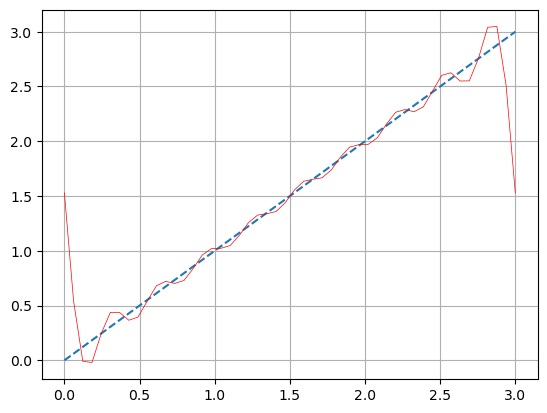

In [15]:
# SOLUÇÃO USANDO INTEGRAÇÂO NUMERICA
from scipy.integrate import quad

s = 3/2
w = 2*np.pi/3


for n in range(1,10):
    An = (2/3)*(quad(lambda x: h(x)*np.cos(w*n*x),0,np.pi)[0])
    Bn = (2/3)*(quad(lambda x: h(x)*np.sin(w*n*x),0,np.pi)[0])
    s += An*np.cos(w*n*x) + Bn*np.sin(w*n*x)
plt.plot(x,[g(xi) for xi in x],'--')
plt.plot(x,s, "r", lw=0.5)
plt.grid()

**Referências**

CHAPRA, Steven, C. e Raymond P. CANALE. Métodos numéricos para engenharia . Disponível em: Minha Biblioteca, (7ª edição). Grupo A, 2016. 